In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import DataAnalysis as da
import numpy as np
import re

The average number of general tweets per user is: 0.17986152003086356
The average number of mentions tweets per user is: 0.12668277528477737
The average number of retweets per user is: 1.183455501634551
The average number of replies per user is: 0.03423419764868322
[('Philae', 30553), ('ESA', 22531), ('esa', 4386), ('philae', 3258), ('esaoperations', 3116)]
[('philae', 33811), ('esa', 26938), ('esaoperations', 3122), ('nasa', 2477), ('bbcbreaking', 2177)]


In [2]:
pd.set_option('max_colwidth', 400)

df = pd.read_csv('./data/CleanedCometLanding.csv')

dfHashtags = pd.read_csv('./data/Hashtags.csv', names = ['Hashtags'])
dfHashtags.drop(index=0)

dfHashtagsCI = pd.read_csv('./data/HashtagsCI.csv', names = ['Hashtags'])
dfHashtagsCI.drop(index=0)

dfHours = pd.read_csv('./data/Hours.csv' , names = ['Hours', 'Frequency'])

dfDays = pd.read_csv('./data/Days.csv' , names = ['Days', 'Frequency'])

dfDates = pd.read_csv('./data/Date.csv' , names = ['Dates', 'Frequency'])

In [3]:
dfDays

,Days,Frequency
0,Wed,72054
1,Thu,684
2,Mon,592
3,Fri,545
4,Tue,467


In [4]:
dfHours

,Hours,Frequency
0,9,9577
1,12,6306
2,16,6106
3,18,6098
4,17,6055


In [5]:
''' This function plots a pie chart for the structure of the dataset (tweets/retweets/replies)'''

def visualiseStruct(df):
    tweetStructs = ['General tweets', 'Mentions', 'Retweets', 'Replies']
    proportions = []
    myExplode = [0, 0, 0.2, 0]

    proportions.append(da.getNumberOfGeneralTweets(df))
    proportions.append(da.getNumberOfMentionTweets(df))
    proportions.append(da.getNumberOfRetweets(df))
    proportions.append(da.getNumberOfReplies(df))
    
    fig1, ax1 = plt.subplots()
    ax1.pie(proportions, labels = tweetStructs, explode = myExplode, autopct='%1.1f%%', shadow = True)
    ax1.set_title('Structure Of The Dataset')
    plt.show()

In [6]:
''' This function plots the word cloud of all hashtags in the dataset '''
#https://www.geeksforgeeks.org/generating-word-cloud-python
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

def createWordCloud(dfHashtags):
    
    data = ''
    
    for (columnName, columnData) in dfHashtags['Hashtags'].iteritems():  
        data += " " + columnData +" "      
    
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color='white',
                          stopwords= stopwords,
                          min_font_size = 10).generate(data)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()

In [7]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
def plotTweetsPerDay(dfDays):
    
    data = dfDays.set_index('Days')['Frequency'].to_dict()
    
    days = list(data.keys())
    frequency = list(data.values())
      
    
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(hours, frequency, color ='maroon',
        width = 0.4)
 
    plt.ylim(0, 5000)
    plt.xlabel("Days Of The Week")
    plt.ylabel("Frequency Of Tweets In Numbers")
    plt.title("Tweet Frequency During Rosetta’s Philae Lander On Different Days Of The Week")
    plt.show()

In [12]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
def plotTweetsPerHours(dfHours):
    
    data = dfHours.set_index('Hours')['Frequency'].to_dict()
    
    hours = list(data.keys())
    frequency = list(data.values())
      
    
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(hours, frequency, color ='maroon',
        width = 0.4)
 
    #plt.ylim(0, 5000)
    plt.xlabel("Hours of the day in the 24 Hour Format")
    plt.ylabel("Frequency Of Tweets In Numbers")
    plt.title("Tweet Frequency During Rosetta’s Philae Lander On Different Hours Of The Day")
    plt.show()

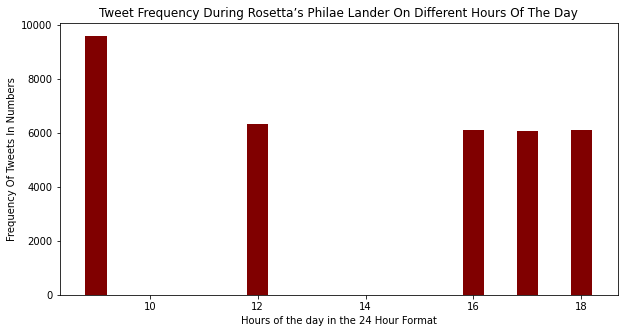

In [13]:
plotTweetsPerHours(dfHours)

In [ ]:
plotTweetsPerDay(dfDays)

In [ ]:
def plotAllCharts():
    visualiseStruct(df)
    createWordCloud(dfHashtags)
    plotTweetsPerDay(dfDays)
    plotTweetsPerHours(dfHours)

In [ ]:
plotAllCharts()

In [ ]:
#''' This function plots a bar chart that displays the frequency of tweets per hour'''
#''' This bar chart helps us understand user behaviour about the most popular time in the day to tweet'''

#def plotTweetsPerHour(data):
    
    

In [ ]:
def plotTweetsPerHour(df):
    

In [ ]:
def plotTweetsPerDate(df):
    